# 🎯 Aula 7 - Gráficos Análises Multivariadas 🎯

# Caso real:

Um professor coletou dados das notas dos alunos em um exame final e o tempo que cada aluno dedicou aos estudos para o exame. Os dados foram plotados em um gráfico de dispersão, onde o eixo x representa o tempo de estudo (em horas) e o eixo y representa as notas dos alunos (em uma escala de 0 a 100).

O que podemos concluir a partir desses dados? (pense primeiro no tipo de dados)

<Axes: xlabel='tempo (h)', ylabel='notas'>

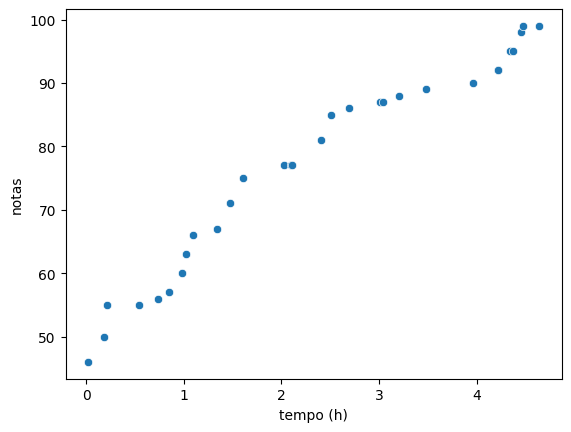

In [78]:
import seaborn as sns
import numpy as np
import pandas as pd 

notas = pd.Series(sorted(np.random.randint(40,100,30))).rename('notas')
tempo = pd.Series(sorted(np.random.random(30)*5)).rename('tempo (h)')

sns.scatterplot(y=notas, x=tempo)

---
# Correlação entre Variáveis

A correlação entre variáveis é uma medida estatística que descreve a extensão da relação entre duas variáveis quantitativas. Compreender a correlação é essencial em muitos campos, pois ajuda a identificar relações potenciais que podem ser exploradas em análises mais profundas.

## Calculando e interpretando a correlação

A função `.corr` é um método em Python usado para calcular a correlação entre pares de variáveis em um DataFrame. Ela retorna uma matriz de correlação que apresenta os coeficientes de correlação para cada par de variáveis.


### Interpretação do Output

- **Valores Próximos a 1 positivo:** Indicam uma forte correlação **linear** positiva (quando uma variável aumenta, a outra também aumenta).
- **Valores Próximos a 1 negativo:** Indicam uma forte correlação **linear** negativa (quando uma variável aumenta, a outra diminui).
- **Valores Próximos a 0:** Indicam uma falta de correlação **linear**.


In [1]:
import pandas as pd

# Dados de exemplo
df = pd.read_excel('./data/titanic.xlsx')

# Calculando a correlação
df.corr()

C:\Users\AllanSuzuki\AppData\Local\Temp\ipykernel_5364\2461167478.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


## Visualização com Heatmap

Após calcular a matriz de correlação com `.corr`, uma maneira eficiente e intuitiva de visualizá-la é por meio de um `heatmap`. Um heatmap usa cores para representar os valores numéricos, facilitando a identificação de padrões de correlação.

### Uso do Heatmap no Seaborn

O Seaborn oferece a função `heatmap` para criar mapas de calor. Esta função transforma os números da matriz de correlação em um gradiente de cores, onde cada cor representa um valor de correlação.

C:\Users\AllanSuzuki\AppData\Local\Temp\ipykernel_5364\1023287376.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


<Axes: >

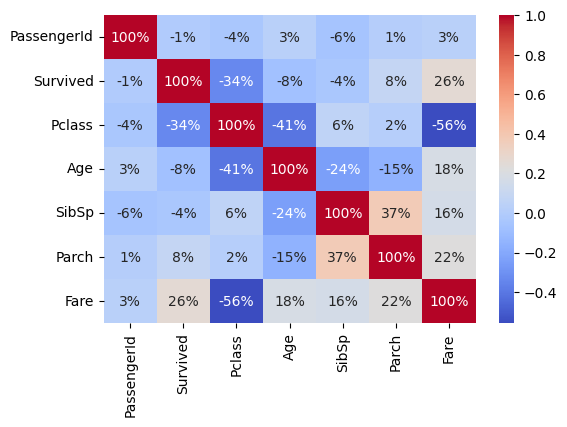

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a matriz de correlação
correlacao = df.corr()

# Criando um heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlacao, annot=True, fmt=".0%", cmap='coolwarm')

**Explicação dos Parâmetros**

- `annot=True` exibe os valores de correlação no heatmap.
- `fmt=".2f"` formata os números para duas casas decimais.
- `cmap` define o mapa de cores.

mapa de cores: https://seaborn.pydata.org/tutorial/color_palettes.html

Neste heatmap, valores mais altos (próximos a +1 ou -1) indicam uma correlação **linear** mais forte, enquanto valores próximos a 0 indicam pouca ou nenhuma correlação. A escolha das cores ('coolwarm' neste caso) ajuda a destacar visualmente as diferenças nas correlações.

A combinação da função `.corr` com a visualização em `heatmap` proporciona uma compreensão rápida e clara das relações entre as variáveis em um conjunto de dados. Dessa forma, conseguimos facilmente identificar potenciais correlaçãoes de pares nas variáveis desejadas (alvo ou _target_).

## [EXTRA] E em caso de correlações não lineares?

Nestes casos, não é o intuito dessa aula, e fica a critério do aluno procurar saber de mais métodos de correlação não lineares por conta.

Porém vamos introduzir uma possível solução: Correlação de $\Phi k$ (Phik).

Mais sobre o assunto neste [artigo aqui](https://medium.com/@asuzukipk/phik-%CF%86k-a-new-and-practical-feature-correlation-1cff226fc5cb)

Phik (Φk) é um coeficiente de correlação alternativo e prático que trabalha consistentemente com variáveis categóricas, ordinais e intervalos. Ele também detecta dependência **não-linear** 💕 e reverte para correlação de Pearson em caso de distribuição de entrada normal bivariada. 

Uma super vantagem é que os valores variam somente entre 0 e 1, ou seja, se os resultados são correlacionados ou não. Uma grande desvantagem é o tempo de processamento dos resultados, que pode ser atenuado se o usuário definir manualmente os tipos de variáveis.

Documentação aqui: [+info](https://phik.readthedocs.io/en/latest/index.html).

Para implementar esta estratégia, 1o precisamos instalar o package `phik`:

In [ ]:
# install phik (if not installed yet)
!python -m pip install phik

Em seguida, importar o `phik` e aplicar o método `.phik_matrix` no nosso dataframe (e esperar pacientemente):

In [19]:
#importar phik e seaborn
import phik
import seaborn as sns

# calcular phik matrix, 
# removendo colunas de texto E ID que não são classificações
df_phik = df.drop(columns=['Name','Ticket','Cabin']).phik_matrix(
    interval_cols = ['Age','Fare']
)

c:\Users\AllanSuzuki\anaconda3\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable PassengerId is large: 1309. Are you sure this is not an interval variable? Analysis for pairs of variables including PassengerId can be slow.
  warnings.warn(


Agora é só utilizar o heatmap pra exibir os resultados:

<Axes: >

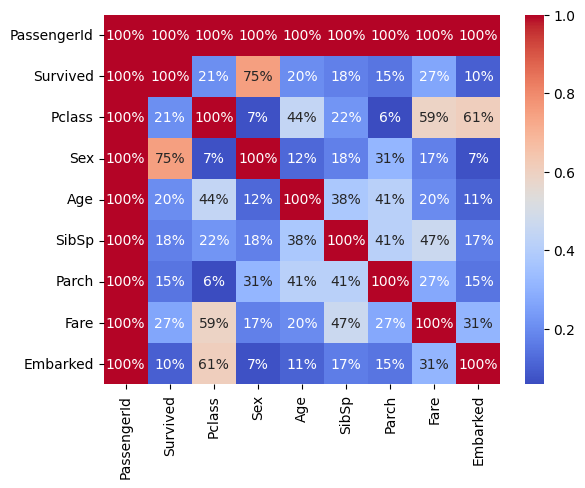

In [47]:
# utilizar o heatmap pra 
sns.heatmap(df_phik, annot=True, fmt='.0%', cmap='coolwarm')

Houve alguma diferença entre o método linear (Pearson) e o não linear (phik)?

Podemos observar que os dados de `Survived` estão mais correlacionadas a 2 variáveis: `Sex` e `Fare`.<br>
Porém vemos que o `ID` tem uma extrema correlação. Claro, já que pra cada único ID sabemos se esse passageiro sobreviveu ou não, mas não nos dá explicação do possível motivo ou característica que o fez sobreviver.<br>
Isso é um cuidado importante que temos que ter ao analisar os dados. Ver se fazem sentido e interpretar corretamente. O ideal seria eliminar as colunas `Name`, `PassengerId`, `Ticket` e `Cabin` da nossa análise de correlação.

# Scatterplot

Um scatterplot é um gráfico de dispersão bidimensional que mostra a relação entre duas variáveis contínuas. Cada ponto no scatterplot representa um par de valores.

## Para que Serve
- Visualizar a relação entre duas variáveis.
- Identificar padrões, tendências ou correlações.

## Aplicações
- Análise de correlação em estudos científicos ou de mercado.
- Visualização de relações em conjuntos de dados grandes.

## Como Fazer no Seaborn

O Seaborn fornece a função `scatterplot` para criar gráficos de dispersão de maneira fácil e intuitiva.

Vamos verificar, por exemplo, se há relação entre o quanto o passageiro pagou em relação a sua idade:

<Axes: xlabel='Age', ylabel='Fare'>

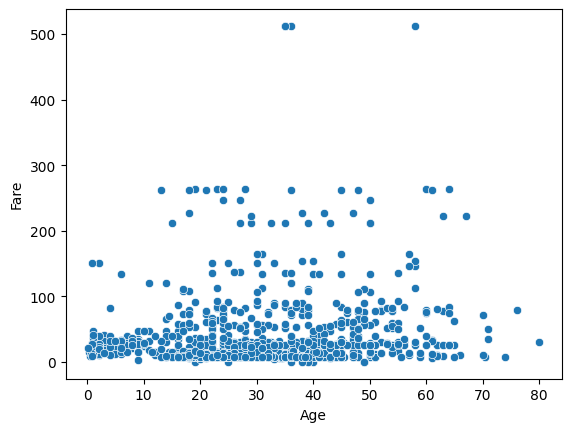

In [39]:
# Criando um scatterplot
sns.scatterplot(x='Age', y='Fare', data=df)

Digamos que agora sabemos em que faixa de idade estavam a "alta nobreza", os "ricos" e o "povo" (será? Observe se o que estamos falando é uma **conclusão** ou **suposição**)

**Explicação dos Parâmetros**
- **'x' e 'y' definem as variáveis dos eixos.**
- **'data' especifica o DataFrame com os dados.**


## Possíveis interpretações

A posição e a distribuição dos pontos no scatterplot podem indicar o tipo e a força da relação entre as duas variáveis. Pode-se analisar algumas coisas como:

1. Relação entre Variáveis:
- Positiva: Pontos ascendentes da esquerda para a direita indicam que, à medida que uma variável aumenta, a outra também aumenta.
- Negativa: Pontos descendentes indicam que, à medida que uma variável aumenta, a outra diminui.
- Sem Relação: Dispersão aleatória dos pontos sugere falta de relação linear.

2. Força da Relação:

- Forte: Pontos próximos de uma linha reta (ascendente ou descendente).
- Fraca: Pontos espalhados, sem seguir uma linha clara.

3. Outliers:

- Pontos que se desviam significativamente do padrão geral. Podem indicar erros ou propriedades únicas.

4. Forma da Relação:

- Pode ser linear, quadrática, exponencial etc. Observada pela curvatura do padrão formado pelos pontos.


## Parâmetro hue

O parâmetro hue em Seaborn permite adicionar uma dimensão categórica aos gráficos, diferenciando os pontos por cores. Dessa forma, fica possível avaliar uma variável adicional em uma certa visualização.

Vamos também utilizar a análise anterior e classificar a cor dos ponto por `Pclass` pra verificar se a conclusão dos dados é de 3 categorias em relação ao qu pagaram:

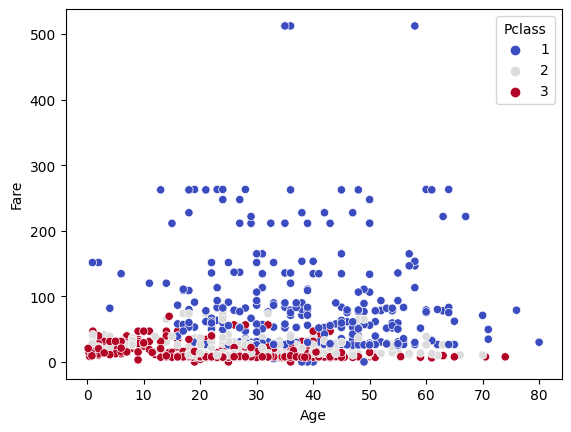

In [44]:
# Adicionando o parâmetro hue ao scatterplot
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=df, palette="coolwarm");

Hmm... parece que temos alguns aproveitadores à bordo hahaha. Observe que temos pessoas da 1a classe que pagaram menos que algumas pessoas da 2a classe e até da 3a classe também. O mesmo sucede com passageiros da 2a classe em relação a 3a.

Mas em relação a idades, não temos claro uma faixa de idade distinta entre classes. Só sabemos que há muitas crianças na 3a classe e menos da 2a e na 1a. Além disso, ocorre praticamente o oposto para pessoas idosas.

# Referências


## Referências

[Documentação Pandas](https://pandas.pydata.org/docs/)

[Documentação do Seaborn](https://seaborn.pydata.org/)

[Documentação do Phik](https://phik.readthedocs.io/en/latest/phik.html)

# Hands-on

1. Vamos continuar a trabalhar no nosso projeto e agora vamos analisar os dados de forma bivariada, ou seja, um em relação a outra. Faça um heatmap de todas as variaveis e veja se os insights que tiveram até agora estão em alinhamento com a análise de correlação (Há casos em que tua análise pode ser tão específica que o gráfico de correlação não consegue analisar. Portanto, use as correlações para guiar seus insights)

2. Para variáveis numéricas que você tenha interesse de se aprofundar, realize o plot dos gráficos de dispersão e observe se há alguma relação visual entre eles. Use também o parâmetro `hue` para trazer a classificação desses dados.